# Data Preprocessing (2)

## Prepare Data

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
if not os.path.exists('titanic'):
    !kaggle competitions download -c titanic
    !unzip titanic.zip -d titanic
    !rm *.zip

'kaggle' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
target = 'Survived'
y = train_df[target]
X = train_df.drop(target, axis=1)
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X = X.drop(['Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [6]:
num_cols = X.select_dtypes('floating').columns
cat_cols = X.columns.difference(num_cols)
num_cols, cat_cols

(Index(['Age', 'Fare'], dtype='object'),
 Index(['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp'], dtype='object'))

In [7]:
nom_cats = pd.Index(['Embarked'])
bin_cats = pd.Index(['Sex'])
ord_cats = cat_cols.difference(nom_cats).difference(bin_cats)
nom_cats, bin_cats, ord_cats

(Index(['Embarked'], dtype='object'),
 Index(['Sex'], dtype='object'),
 Index(['Parch', 'Pclass', 'SibSp'], dtype='object'))

In [8]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

num_prep = make_pipeline(
    SimpleImputer(strategy='mean'),  # 'median'
    StandardScaler(),
)

cat_prep = make_column_transformer(
    (OneHotEncoder(sparse_output=False), nom_cats),
    (OrdinalEncoder(), ord_cats.append(bin_cats)),
    verbose_feature_names_out=False
)

preprocessor = make_column_transformer(
    (num_prep, num_cols),
    (cat_prep, cat_cols),
    verbose_feature_names_out=False
)
    
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Age', 'Fare'], dtype='object')),
                                ('columntransformer',
                                 ColumnTransformer(transformers=[('onehotencoder',
                                                                  OneHotEncoder(sparse_output=False),
                                                                  Index(['Embarked'], dtype='object')),
                                                                 ('ordinalencoder',
                                                                  OrdinalEncoder(),
                                                                  Index(['Parch', 'Pclass', 'SibSp', 'Sex'], dtype='object'))],
                                                   verbose_feature_names_out=False),
                                 Index(['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp'], dtype='object'))],
                  verbose_feature_names_out=False)

In [9]:
X_prep = pd.DataFrame(
    preprocessor.fit_transform(X),
    index=X.index,
    columns=preprocessor.get_feature_names_out(X.columns)
)
X_prep

,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Parch,Pclass,SibSp,Sex
PassengerId,,,,,,,,,,
1,-0.592481,-0.502445,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
2,0.638789,0.786845,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.284663,-0.488854,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0
4,0.407926,0.420730,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.407926,-0.486337,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
887,-0.207709,-0.386671,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
888,-0.823344,-0.044381,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
889,0.000000,-0.176263,0.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0


## Dimensionality Reduction

### PCA

PCA aims to find a linear transformation to compress the data in a lower dimensional space.

Any linear transformation is equivalent to a matrix multiplication.

Given a dataset $X\in\mathbb{R}^{N\times D}$ ($N$ samples, each with $D$ features), PCA uses a matrix $W\in\mathbb{R}^{K\times D}$ to transform the dataset into $$X^{\prime}=XW^T\in\mathbb{R}^{N\times K}.$$

In [10]:
X_train = X
X = X_prep.values
X.shape

(891, 10)

The dataset must be preprocessed with StandardScalar (so mean = 0 and std = 1) before applying PCA!

The numerical features have already been scaled but the encoded categorical features have not...

In [11]:
X.mean(axis=0)

array([ 2.56279597e-16, -4.37360585e-17,  1.88552189e-01,  8.64197531e-02,
        7.22783389e-01,  2.24466891e-03,  3.81593715e-01,  1.30864198e+00,
        5.07295174e-01,  6.47586981e-01])

In [12]:
X = StandardScaler().fit_transform(X)

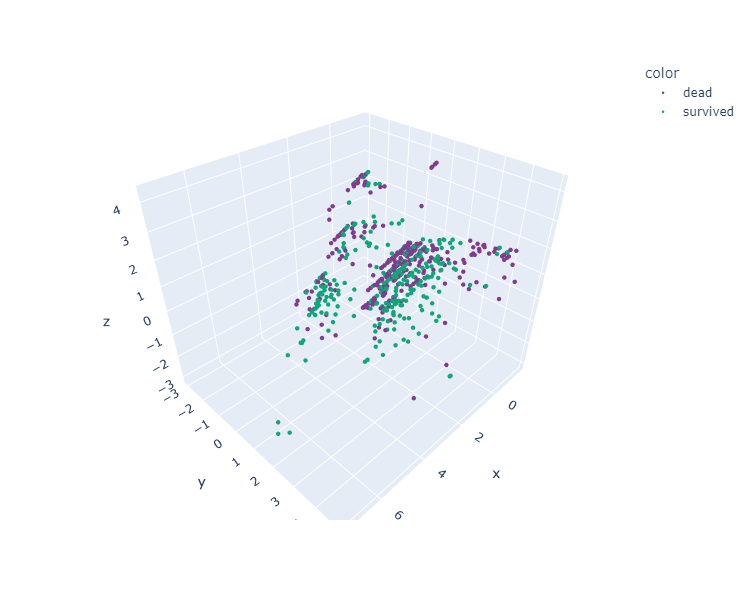

In [13]:
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(3)
X3d = pca.fit_transform(X)
px.scatter_3d(
    x=X3d[:,0], y=X3d[:,1], z=X3d[:,2],
    color=y.map({0: 'dead', 1: 'survived'}),
    color_discrete_sequence=px.colors.qualitative.Bold,
    width=800, height=600
).update_traces(
    marker_size=2.5
)


We can get the transformation matrix $W$ by `pca.components_`.

(Note: sklearn has the naming convention that an attribute ending with `_` obtains its value after fitting.)

In [14]:
W = pca.components_
np.allclose(X3d - X @ W.T, 0)  # check X3d == X @ W.T, with a tolerance of tiny errors

True

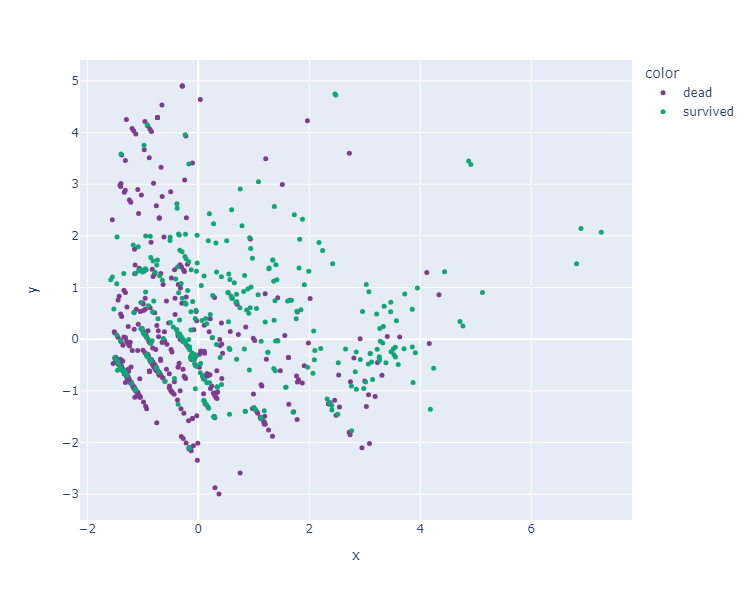

In [15]:
W2 = W[:2]  # the first 2 components
X2d = X @ W2.T

px.scatter(
    x=X2d[:,0], y=X2d[:,1],
    color=y.map({0: 'dead', 1: 'survived'}),
    color_discrete_sequence=px.colors.qualitative.Bold,
    width=800, height=600
).update_traces(
    marker_size=5
)

PCA maximizes the variance of the points after the transformation (as widely spread as possible).

In [16]:
pca.explained_variance_ratio_

array([0.21698165, 0.17880595, 0.1637684 ])

In [17]:
np.cumsum(pca.explained_variance_ratio_)

array([0.21698165, 0.3957876 , 0.559556  ])

This means using PCA to transform the dataset into 3D can preserve 56\% of the original variance of the data.

### t-SNE

t-SNE is a non-linear dimensionality reduction algorithm which uses k-nearest neighbors to preserve the local structure of the data. It is often used to visualize high-dimensional data to provide insights. However, it is much slower than PCA.

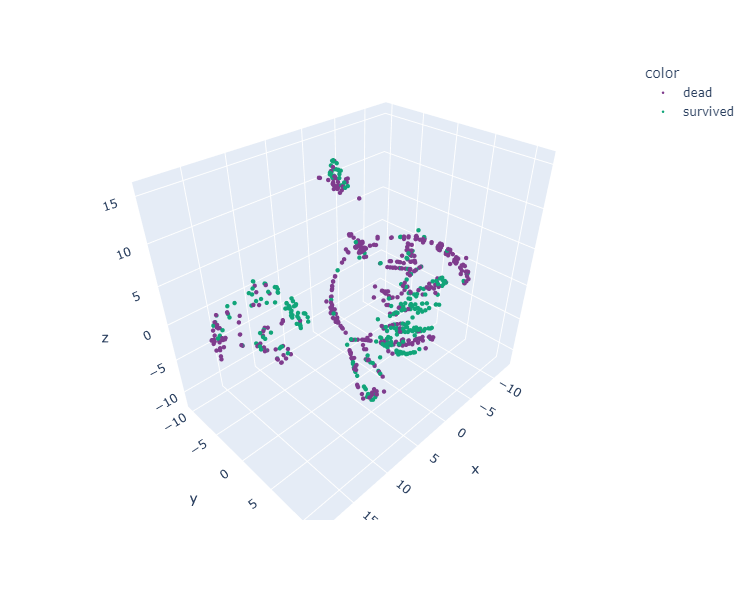

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(3)

X3d_tsne = tsne.fit_transform(X)

px.scatter_3d(
    x=X3d_tsne[:,0], y=X3d_tsne[:,1], z=X3d_tsne[:,2],
    color=y.map({0: 'dead', 1: 'survived'}),
    color_discrete_sequence=px.colors.qualitative.Bold,
    width=800, height=600
).update_traces(
    marker_size=2.5
)

We can see that samples of the same class are clustered together, and different classes are more separated than PCA.

## Outlier Detection

In [47]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

iforest = IsolationForest(contamination=.05)
ocsvm = OneClassSVM(nu=.05)

def to_labels(anomaly):
    return ['normal' if a == 1 else 'outlier' for a in anomaly]

anomaly1 = to_labels(iforest.fit_predict(X))
anomaly2 = to_labels(ocsvm.fit_predict(X))

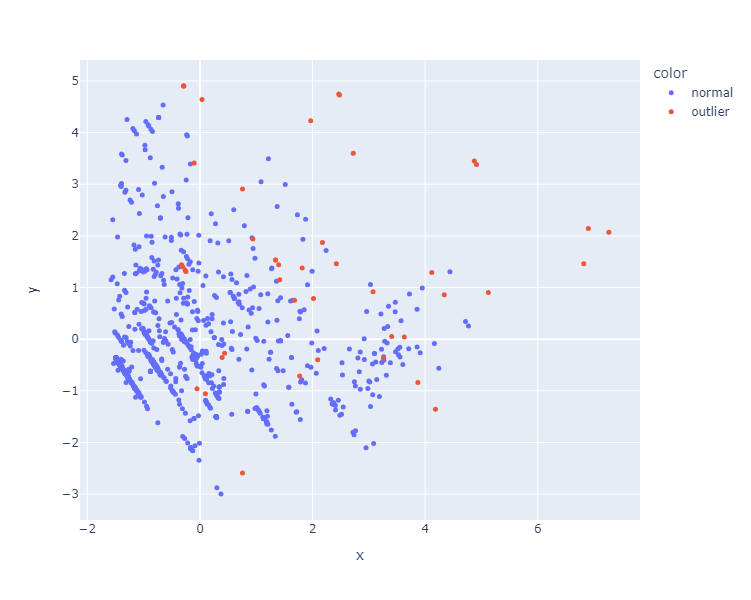

In [48]:
px.scatter(
    x=X2d[:,0], y=X2d[:,1],
    color=anomaly1,
    color_discrete_sequence=px.colors.qualitative.Plotly,
    width=800, height=600
).update_traces(
    marker_size=5
)

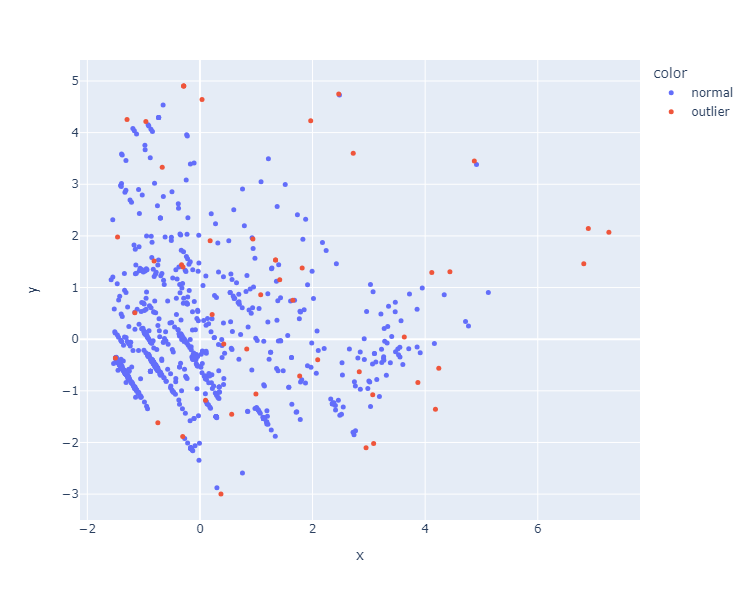

In [49]:
px.scatter(
    x=X3d[:,0], y=X2d[:,1],
    color=anomaly2,
    color_discrete_sequence=px.colors.qualitative.Plotly,
    width=800, height=600
).update_traces(
    marker_size=5
)